In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

Generate the Dataset

In [2]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)

In [3]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 1)
x_train, y_train = series[:7000, :n_steps], series[:7000, -1]
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
x_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [4]:
x_train.shape, y_train.shape

((7000, 50, 1), (7000, 1))

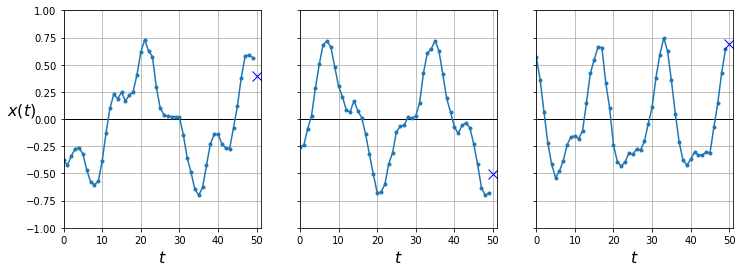

In [5]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(x_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))

plt.show()

Naive predictions

In [6]:
y_pred = x_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.020211367

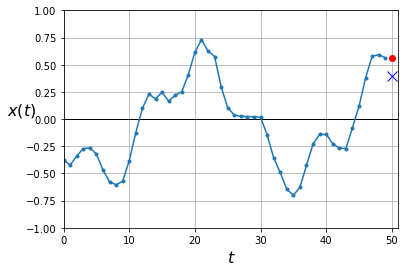

In [7]:
plot_series(x_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

Linear predictions

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer='adam')
history = model.fit(x_train, y_train, epochs=20, 
                    validation_data=(x_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 1s 3ms/step - loss: 0.1001 - val_loss: 0.0545
Epoch 2/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0379 - val_loss: 0.0266
Epoch 3/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0202 - val_loss: 0.0157
Epoch 4/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.0116
Epoch 5/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0103 - val_loss: 0.0098
Epoch 6/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.0087
Epoch 7/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0079
Epoch 8/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0071
Epoch 9/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 10/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0061 - val_loss: 0.0062

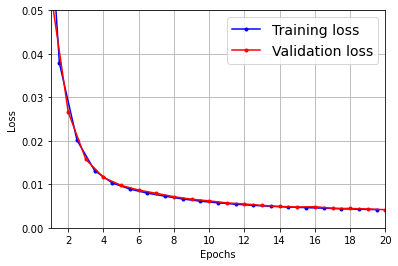

In [9]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

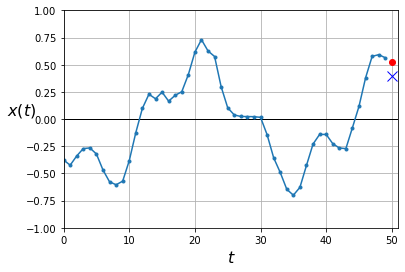

In [10]:
y_pred = model.predict(x_valid)
plot_series(x_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

Simple RNN

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

optimizer = keras.optimizers.Adam(learning_rate=5e-3)
model.compile(loss='mse', optimizer=optimizer)
history = model.fit(x_train, y_train, epochs=20, 
                    validation_data=(x_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 13s 59ms/step - loss: 0.0967 - val_loss: 0.0489
Epoch 2/20
219/219 [==============================] - 13s 60ms/step - loss: 0.0369 - val_loss: 0.0296
Epoch 3/20
219/219 [==============================] - 13s 59ms/step - loss: 0.0253 - val_loss: 0.0218
Epoch 4/20
219/219 [==============================] - 13s 58ms/step - loss: 0.0198 - val_loss: 0.0177
Epoch 5/20
219/219 [==============================] - 13s 60ms/step - loss: 0.0166 - val_loss: 0.0151
Epoch 6/20
219/219 [==============================] - 13s 60ms/step - loss: 0.0146 - val_loss: 0.0134
Epoch 7/20
219/219 [==============================] - 13s 60ms/step - loss: 0.0132 - val_loss: 0.0123
Epoch 8/20
219/219 [==============================] - 13s 60ms/step - loss: 0.0124 - val_loss: 0.0116
Epoch 9/20
219/219 [==============================] - 13s 58ms/step - loss: 0.0118 - val_loss: 0.0112
Epoch 10/20
219/219 [==============================] - 13s 57ms/step - loss: 0.011

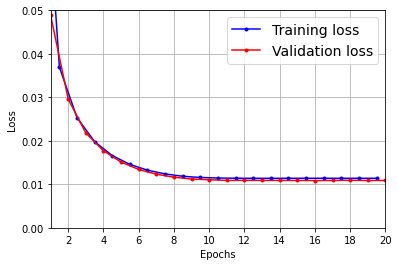

In [12]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

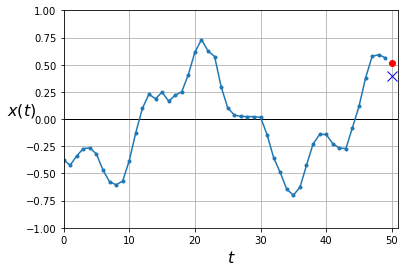

In [13]:
y_pred = model.predict(x_valid)
plot_series(x_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

Deep RNNs

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, input_shape=[None, 1], 
                           return_sequences=True),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

model.compile(loss='mse', optimizer='adam')
history = model.fit(x_train, y_train, epochs=20, 
                    validation_data=(x_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 46s 207ms/step - loss: 0.0492 - val_loss: 0.0090
Epoch 2/20
219/219 [==============================] - 46s 208ms/step - loss: 0.0070 - val_loss: 0.0065
Epoch 3/20
219/219 [==============================] - 45s 207ms/step - loss: 0.0053 - val_loss: 0.0045
Epoch 4/20
219/219 [==============================] - 44s 200ms/step - loss: 0.0045 - val_loss: 0.0040
Epoch 5/20
219/219 [==============================] - 43s 198ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 6/20
219/219 [==============================] - 45s 204ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 7/20
219/219 [==============================] - 46s 209ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 8/20
219/219 [==============================] - 44s 203ms/step - loss: 0.0037 - val_loss: 0.0033
Epoch 9/20
219/219 [==============================] - 46s 210ms/step - loss: 0.0036 - val_loss: 0.0032
Epoch 10/20
219/219 [==============================] - 46s 209ms/step - l

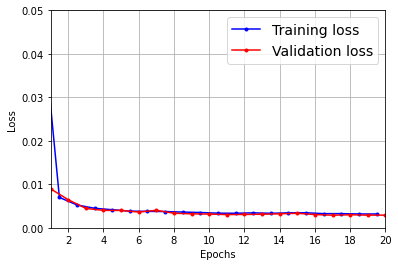

In [15]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

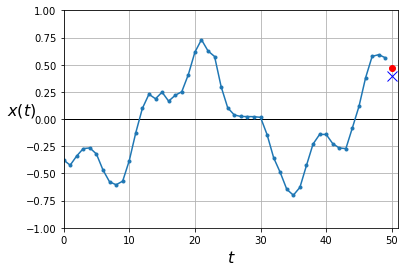

In [16]:
y_pred = model.predict(x_valid)
plot_series(x_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [17]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, input_shape=[None, 1], 
                           return_sequences=True),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer='adam')
history = model.fit(x_train, y_train, epochs=20, 
                    validation_data=(x_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 30s 134ms/step - loss: 0.0232 - val_loss: 0.0052
Epoch 2/20
219/219 [==============================] - 28s 127ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 3/20
219/219 [==============================] - 29s 132ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 4/20
219/219 [==============================] - 29s 134ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 5/20
219/219 [==============================] - 27s 124ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 6/20
219/219 [==============================] - 29s 134ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 7/20
219/219 [==============================] - 28s 129ms/step - loss: 0.0031 - val_loss: 0.0034
Epoch 8/20
219/219 [==============================] - 29s 131ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 9/20
219/219 [==============================] - 29s 132ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 10/20
219/219 [==============================] - 29s 134ms/step - l

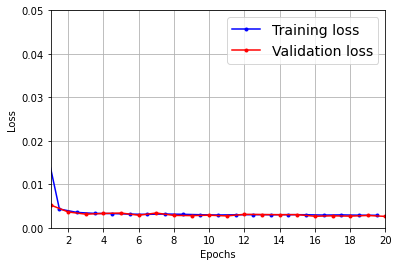

In [18]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

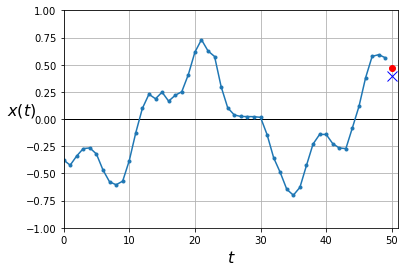

In [19]:
y_pred = model.predict(x_valid)
plot_series(x_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

Forecasting Several Steps Ahead

In [20]:
np.random.seed(43)

series = generate_time_series(1, n_steps + 10)
x_new, y_new = series[:, :n_steps], series[:, n_steps:]
x = x_new

for step_ahead in range(10):
    y_pred_one = model.predict(x[:, step_ahead:])[:, np.newaxis, :]
    x = np.concatenate([x, y_pred_one], axis=1)
    
y_pred = x[:, n_steps:]

In [21]:
y_pred.shape

(1, 10, 1)

In [22]:
def plot_multiple_forecast(x, y, y_pred):
    n_steps = x.shape[1]
    ahead = y.shape[1]
    plot_series(x[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), y[0, :, 0], 
             'ro-', label='Actual')
    plt.plot(np.arange(n_steps, n_steps + ahead), y_pred[0, :, 0], 
             'bx-', label='Forecast', markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

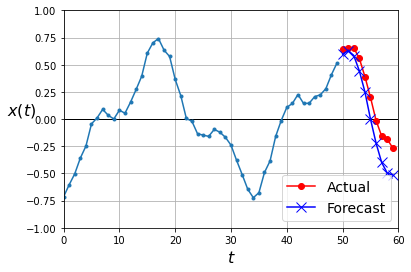

In [23]:
plot_multiple_forecast(x_new, y_new, y_pred)
plt.show()

In [24]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
x_train, y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
x_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
x_test, y_test = series[9000:, :n_steps], series[9000:, -10:, 0]

In [25]:
x = x_valid

for step_ahead in range(10):
    y_pred_one = model.predict(x)[:, np.newaxis, :]
    x = np.concatenate([x, y_pred_one], axis=1)

y_pred = x[:, n_steps:, 0]

In [26]:
y_pred.shape

(2000, 10)

In [27]:
np.mean(keras.metrics.mean_squared_error(y_valid, y_pred))

0.027510826

In [28]:
# navie predictions
y_naive_pred = np.tile(x_valid[:, -1], 10)
np.mean(keras.metrics.mean_squared_error(y_valid, y_naive_pred))

0.25697407

In [29]:
# simple linear model
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(10)
])

model.compile(loss='mse', optimizer='adam')
history = model.fit(x_train, y_train, epochs=20, 
                    validation_data=(x_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 1s 3ms/step - loss: 0.1343 - val_loss: 0.0606
Epoch 2/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0496 - val_loss: 0.0425
Epoch 3/20
219/219 [==============================] - 1s 2ms/step - loss: 0.0385 - val_loss: 0.0353
Epoch 4/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0331 - val_loss: 0.0311
Epoch 5/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0298 - val_loss: 0.0283
Epoch 6/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0273 - val_loss: 0.0264
Epoch 7/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0256 - val_loss: 0.0249
Epoch 8/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0244 - val_loss: 0.0237
Epoch 9/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0234 - val_loss: 0.0229
Epoch 10/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0227 - val_loss: 0.0222

In [30]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, input_shape=[None, 1], 
                           return_sequences=True),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])

model.compile(loss='mse', optimizer='adam')
history = model.fit(x_train, y_train, epochs=20, 
                    validation_data=(x_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 32s 142ms/step - loss: 0.0669 - val_loss: 0.0317
Epoch 2/20
219/219 [==============================] - 29s 131ms/step - loss: 0.0265 - val_loss: 0.0200
Epoch 3/20
219/219 [==============================] - 30s 136ms/step - loss: 0.0183 - val_loss: 0.0160
Epoch 4/20
219/219 [==============================] - 29s 134ms/step - loss: 0.0155 - val_loss: 0.0144
Epoch 5/20
219/219 [==============================] - 28s 128ms/step - loss: 0.0139 - val_loss: 0.0118
Epoch 6/20
219/219 [==============================] - 30s 136ms/step - loss: 0.0128 - val_loss: 0.0112
Epoch 7/20
219/219 [==============================] - 30s 138ms/step - loss: 0.0122 - val_loss: 0.0110
Epoch 8/20
219/219 [==============================] - 30s 135ms/step - loss: 0.0115 - val_loss: 0.0103
Epoch 9/20
219/219 [==============================] - 29s 133ms/step - loss: 0.0111 - val_loss: 0.0112
Epoch 10/20
219/219 [==============================] - 29s 133ms/step - l

In [31]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
x_new, y_new = series[:, :50, :], series[:, -10:, :]
y_pred = model.predict(x_new)[..., np.newaxis]

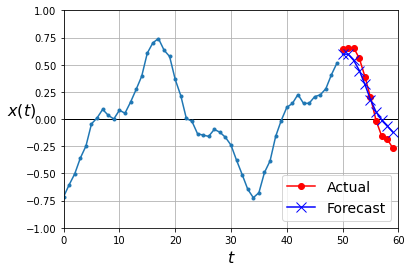

In [32]:
plot_multiple_forecast(x_new, y_new, y_pred)
plt.show()

In [33]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
x_train = series[:7000, :n_steps]
x_valid = series[7000:9000, :n_steps]
x_test = series[9000:, :n_steps]

y = np.empty((10000, n_steps, 10))

for step_ahead in range(1, 10 + 1):
    y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]

y_train = y[:7000]
y_valid = y[7000:9000]
y_test = y[9000:]

In [34]:
x_train.shape, y_train.shape

((7000, 50, 1), (7000, 50, 10))

In [35]:
def last_time_step_mse(y_true, y_pred):
    return keras.metrics.mean_squared_error(y_true[:, -1], y_pred[:, -1])

In [36]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, input_shape=[None, 1], 
                           return_sequences=True),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

optimizer = keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='mse', 
              optimizer=optimizer, 
              metrics=[last_time_step_mse])

history = model.fit(x_train, y_train, epochs=20, 
                    validation_data=(x_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 31s 139ms/step - loss: 0.0508 - last_time_step_mse: 0.0400 - val_loss: 0.0429 - val_last_time_step_mse: 0.0324
Epoch 2/20
219/219 [==============================] - 29s 134ms/step - loss: 0.0395 - last_time_step_mse: 0.0283 - val_loss: 0.0352 - val_last_time_step_mse: 0.0245
Epoch 3/20
219/219 [==============================] - 28s 130ms/step - loss: 0.0319 - last_time_step_mse: 0.0204 - val_loss: 0.0289 - val_last_time_step_mse: 0.0168
Epoch 4/20
219/219 [==============================] - 29s 134ms/step - loss: 0.0295 - last_time_step_mse: 0.0182 - val_loss: 0.0271 - val_last_time_step_mse: 0.0149
Epoch 5/20
219/219 [==============================] - 30s 137ms/step - loss: 0.0269 - last_time_step_mse: 0.0148 - val_loss: 0.0257 - val_last_time_step_mse: 0.0139
Epoch 6/20
219/219 [==============================] - 30s 136ms/step - loss: 0.0254 - last_time_step_mse: 0.0130 - val_loss: 0.0249 - val_last_time_step_mse: 0.0118
Epoch 7/20

In [37]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
x_new, y_new = series[:, :50, :], series[:, -10:, :]
y_pred = model.predict(x_new)[:, -1][..., np.newaxis]

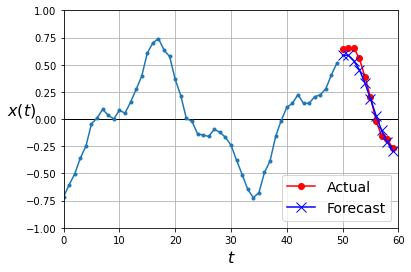

In [38]:
plot_multiple_forecast(x_new, y_new, y_pred)
plt.show()